Os seguintes valores são calculado com o histograma e são largamente utilizados para representar imagens:
- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia



In [3]:
#dependencias necessárias
!python -m pip install -U scikit-image
!python -m pip install -U scikit-learn
!python -m pip install -U scipy
!python -m pip install -U pandas
!python -m pip install -U opencv-python
!python -m pip install -U openpyxl
!python -m pip install -U matplotlib


  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/ce/d0/a3f60c9f57ed295b3076e4acdb29a37bbd8823452562ab2ad51b03d6f377/scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/6c/82/681469e10856d28f0367e38dca840c2a5bd768105cef30def31658c136da/imageio-2.32.0-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/f5/72/68ea763b5f3e3d9871492683059ed4724fd700dbe54aa03cdda7a9692129/tifffile-2023.9.26-py3-none-any.whl.metadata
  Using cached tifffile-2023.9.26-py3-none-any.whl.metadata (30 kB)
  Obtaining dependency information for lazy_loader>=0.3 from https://files.pythonhosted.org/packages/a1/c3/65b3814e155836acacf720e5be3b5757130346670ac454fee29d3eda1381/lazy_loader-0.3-py3-none-any.whl.metadata
  U


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ----------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 445.2 kB/s eta 0:00:24
   ---------------------------------------- 0.1/10.6 MB 550.5 kB/s eta 0:00:20
    --------------------------------------- 0.1/10.6 MB 950.9 kB/s eta 0:00:12
    --------------------------------------- 0.3/10.6 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.6 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/10.6 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/10.6 MB 4.0 MB/s eta 0:00:03
   --------- -------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     --- --------------------------------- 20.5/250.0 kB 165.2 kB/s eta 0:00:02
     --- --------------------------------- 20.5/250.0 kB 165.2 kB/s eta 0:00:02
     ------ ------------------------------ 41.0/250.0 kB 219.4 kB/s eta 0:00:01
     --------- --------------------------- 61.4/250.0 kB 273.8 kB/s eta 0:00:01
     ----------------- ------------------ 122.9/250.0 kB 450.6 kB/s eta 0:00:01
     -----------------------------------  245.8/250.0 kB 793.0 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 807.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/59/e2/6b155713e8da8274367b41315b66260f9d3c52d9f4b26336ddc3986ba612/matplotlib-3.8.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 330.3 kB/s eta 0:00:24
   ---------------------------------------- 0.0/7.6 MB 330.3 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.6 MB 585.1 kB/s eta 0:00:13
    --------------------------------------- 0.2/7.6 MB 930.9 kB/s eta 0:00:09
   - -------------------------------------- 0.4/7.6 MB 1.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/7.6 MB 1.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.6 MB 2.2 MB/s eta 0:00:04
   ------ -----------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score
import numpy as np
from glob import glob
import pandas as pd
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import os

In [5]:

from skimage import exposure

def descritor_histograma(img_rgb):
    """
    Recebe uma imagem RGB como parâmetro
    """

    # Defina o número de intervalos de intensidade (256 para imagens em 8 bits)
    num_bins = 256

    # Inicialize o histograma para cada canal de cor
    hist_r = np.zeros(num_bins, dtype=int)
    hist_g = np.zeros(num_bins, dtype=int)
    hist_b = np.zeros(num_bins, dtype=int)

    # Calcule o histograma manualmente para cada canal
    for row in img_rgb:
        for pixel in row:
            hist_r[pixel[0]] += 1
            hist_g[pixel[1]] += 1
            hist_b[pixel[2]] += 1

    # Equalize o histograma para cada canal
    img_eq_r = exposure.equalize_hist(img_rgb[:, :, 0])
    img_eq_g = exposure.equalize_hist(img_rgb[:, :, 1])
    img_eq_b = exposure.equalize_hist(img_rgb[:, :, 2])

    # Calcule as estatísticas para cada canal equalizado
    mean_r = np.mean(img_eq_r)
    mean_g = np.mean(img_eq_g)
    mean_b = np.mean(img_eq_b)

    variance_r = np.var(img_eq_r)
    variance_g = np.var(img_eq_g)
    variance_b = np.var(img_eq_b)

    skewness_r = np.mean((img_eq_r - mean_r) ** 3) / np.mean((img_eq_r - mean_r) ** 2) ** (3 / 2)
    skewness_g = np.mean((img_eq_g - mean_g) ** 3) / np.mean((img_eq_g - mean_g) ** 2) ** (3 / 2)
    skewness_b = np.mean((img_eq_b - mean_b) ** 3) / np.mean((img_eq_b - mean_b) ** 2) ** (3 / 2)

    kurtosis_r = np.mean((img_eq_r - mean_r) ** 4) / np.mean((img_eq_r - mean_r) ** 2) ** 2
    kurtosis_g = np.mean((img_eq_g - mean_g) ** 4) / np.mean((img_eq_g - mean_g) ** 2) ** 2
    kurtosis_b = np.mean((img_eq_b - mean_b) ** 4) / np.mean((img_eq_b - mean_b) ** 2) ** 2

    energy_r = np.sum(img_eq_r ** 2)
    energy_g = np.sum(img_eq_g ** 2)
    energy_b = np.sum(img_eq_b ** 2)

    entropy_r = -np.sum(img_eq_r * np.log2(img_eq_r + np.finfo(float).eps))
    entropy_g = -np.sum(img_eq_g * np.log2(img_eq_g + np.finfo(float).eps))
    entropy_b = -np.sum(img_eq_b * np.log2(img_eq_b + np.finfo(float).eps))

    # Soma as estatísticas dos três canais
    media = mean_r + mean_g + mean_b
    var = variance_r + variance_g + variance_b
    sk = skewness_r + skewness_g + skewness_b
    kur = kurtosis_r + kurtosis_g + kurtosis_b
    ener = energy_r + energy_g + energy_b
    entr = entropy_r + entropy_g + entropy_b

    return [media, var, sk, kur, ener, entr]

# Exemplo de uso:
# result = descritor_histograma(sua_imagem_rgb)




- Procurar uma base de imagens com duas classes ou mais
- Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz, e adicionar uma coluna na matriz para os rótulos das classes. 
- Plotar os atributos dois a dois (scatter plot)
- A entrega será:
    - Notebook com os códigos;
    - Short paper de até 4 páginas com:
        - Introdução: apresentar o problema/base escolhida;
        - Metodologia: explicar os atributos e como são calculados;
        - Resultados: resultado da classificação e scatter plots dos atributos;
        - Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;
        - Conclusão.
- Será feito pela equipe definida no inicio da disciplina;
- Entrega e apresentação: 25/10/2023

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

def classification(X, y):
    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """

    # Separar conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    # Criar instância do imputer com estratégia 'constant' para ignorar os valores ausentes
    imputer = SimpleImputer(strategy='constant', fill_value=-999)

    # Ajustar o imputer nos dados de treinamento e transformar os dados de treinamento e teste
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Criar instância do classificador MLP
    clf = MLPClassifier(hidden_layer_sizes=(10, 5))

    # Treinar o classificador
    clf.fit(X_train_imputed, y_train)

    # Realizar a predição
    pred = clf.predict(X_test_imputed)

    # Calcular o resultado utilizando a acurácia
    acuracia = accuracy_score(y_test, pred)

    return np.round(acuracia, decimals=2)


# Processamento dos dados

In [ ]:
data = []

dirs = "dados/*.jpg"
excel_name = 'dados.xlsx'
column_names = ['fname', 'deworm', 'mean', 'var', 'skew', 'kurtosis', 'energy', 'entropy']

fnames = glob(dirs)

for name in fnames:
    
    vermifuga = 0
    
    famacha = int(name[-5])
    if famacha > 2:
        vermifuga = 1
    
    img = imread(name)
    
    aux = descritor_histograma(img)
    aux.insert(0,name[6:])
    aux.insert(1,vermifuga)
    data.append(aux)
    
print(data)

df = pd.DataFrame(data,columns=column_names)

df.to_excel(excel_name, index=False)

# Carregamento dos dados já processados

In [ ]:
# Carregar o arquivo Excel em um DataFrame
df = pd.read_excel('dados.xlsx')


matriz = []

#salvando os dados em uma matriz
for i in range(0,len(df),1):
    matriz.append([df["mean"][i],df["var"][i],df["skew"][i],df["kurtosis"][i], df["energy"][i],df["entropy"][i]])

famacha = df["deworm"]


#print(classification(matriz, famacha))


# Criação dos Scatter plots 2 a 2

In [ ]:
output = "scatter_plots"

if not os.path.exists(output):
    os.makedirs(output)

columns = ["mean", "var", "skew", "kurtosis", "energy", "entropy"]

for i in range(0, len(columns) - 1, 1):
    for j in range(i + 1, len(columns), 1):
        plt.figure(figsize=(8, 6))

        plt.scatter(df[columns[i]], df[columns[j]], c='blue', label=columns[i])
        plt.scatter(df[columns[i]], df[columns[j]], c='black', label=columns[j])
        
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.legend()

        fig_name = f'{columns[i]}_x_{columns[j]}.png'
        plt.savefig(os.path.join(output, fig_name))
        plt.close()  # Fechar a figura para evitar sobreposição ao criar a próxima


# Procurando padrões

In [ ]:
lista = []
for i in range(0,1000,1):
    lista.append(classification(matriz, famacha))
    

print(f"\nMaior Valor: {max(lista)}\nMédia: {np.mean(lista)}\nMenor: {min(lista)}")

# Aplicando Transformação de Intensidade


In [ ]:
def alargamento_contraste(nome_imagem:str, k:float = 1, E:float = 1)->np.ndarray:
    """
    Realiza o Alargamento de contraste de uma imagem
    
    Parâmetros:
        nome_imagem::str: Nome da imagem que será lida e processada
        k::float: controla a intensidade da transformação. Quanto maior o valor de k, mais intensa será a transformação, onde k afeta a amplitude da função de transformação.Se k for pequeno, a transformação terá um efeito mais suave.
        E::float: Expoente controla a forma da transformação. Se E for um valor baixo, a transformação será mais linear. Se E for um valor mais alto, a transformação será menos linear. Valores de E maiores resultam em uma transformação mais agressiva nos extremos dos valores de pixel, enquanto valores menores de E proporcionam uma transformação mais suave.
        
    Retorno:
        imagem_transformada::numpy.ndarray: Imagem transformada pelo apargamento de contraste
    """
    
    imagem = imread(nome_imagem)
    # Adiciona uma constante pequena para evitar log(0) e/ou divisão por zero
    epsilon = 1e-8
    
    # Aplica a transformação de alargamento de contraste
    imagem_transformada = 1 / (1 + (k / (imagem+epsilon))**E)
    
    # Garante que os valores estejam no intervalo [0, 1] (apenas int, nada de float) 
    imagem_transformada = np.clip(imagem_transformada, 0, 255)#.astype(np.uint8)
    
    return imagem_transformada

def negativo(nome_imagem:str)->np.ndarray:
    """
    Transforma uma imagem para sua versão negativa
    
    Parâmetros:
        img::string: Nome de uma imagem
        
    Retorno:
        neg::np.array: Imagem negativada 
        
    """
    imagem = imread(nome_imagem)
    """
    realiza a inversão do valor e o converte para seu valor inveso absoluto (ignora o sina);
    """
    neg = abs(255-imagem)
    
    return neg

def logaritmo(nome_imagem:str, c:float=1)->np.ndarray:
    """
    Calcula a transformação de intensidade logarítma da imagem
    
    Parâmetros:
        nome_imagem::str: Nome da imagem que será transformada
        c::float: coeficiente que multiplica o resultado da transformação logarítmica
    Retorno:
        logaritmico_img::np.ndarray: Imagem gerada apartir do calculo do logartimo 
    """
    img = imread(nome_imagem)
    
    # Adiciona uma constante pequena para evitar log(0)
    epsilon = 1e-8
    
    # Aplica a transformação logarítmica para cada canal RGB
    logaritmico_img = c * np.log(1 + img + epsilon)
    
    # Garante que os valores estejam no intervalo [0, 255] e que sejam inteiros
    logaritmico_img = np.clip(logaritmico_img, 0, 255).astype(np.uint8)
    
    return logaritmico_img

def transformacao_potencia(nome_imagem:str, c:float=1.0, gamma:float=1.0)->np.ndarray:
    """
    Calcula a transformação de pontencia de uma imagem e gera uma nova imagem com base nisso
    
    Parâmetros:
        nome_imagem::str: Nome da imagem que será transformada
        c::float: coeficiente que multiplica o resultado da transformação de potência. Ele ajusta a amplitude ou intensidade da transformação.
        gamma::float: controla a forma da curva da transformação de potência.
    """
    imagem = imread(nome_imagem)
    
    # Aplica a transformação de potência
    imagem_transformada = c * np.power(imagem, gamma)
    
    # Garante que os valores estejam no intervalo [0, 255]
    imagem_transformada = np.clip(imagem_transformada, 0, 255).astype(np.uint8)
    
    return imagem_transformada

# A escolha dos parâmetros ideais depende do tipo de transformação que você deseja aplicar à imagem e dos efeitos visuais específicos que procura.

1. **Para a função `alargamento_contraste`**:
   - `k`: valores como 1.5, 2.0, 2.5 ou 3.0 para ajustar a intensidade da transformação.
   - `E`: valores como 0.5, 1.0, 1,5 ou 2.0 para controlar a forma da transformação.

2. **Para a função `negativo`**:
   - Não há parâmetros adicionais para ajustar nesta função.

3. **Para a função `logaritmo`**:
   - `c`: valores como 1, 2, 3 ou 4 para ajustar a intensidade da transformação logarítmica.

4. **Para a função `transformacao_potencia`**:
   - `c`: valores como 1, 2, 3  ou 4 para ajustar a intensidade da transformação de potência.
   - `gamma`: valores como 0.5, 1.0, 1,5 ou 2.0 para controlar a forma da transformação de potência.

# Acessando as imagens originais

In [ ]:
dirs = "dados/*.jpg"

fnames = glob(dirs)

# Alargamento de Contraste

In [ ]:
output = "Alargamento_Contraste"
k_input = (1.5, 2.0, 2.5, 3.0)
E_input = (0.5, 1.0, 1.5, 2.0)

if not os.path.exists(output):
    os.makedirs(output)

for i in range(0,len(E_input),1):
    name_path = os.path.join(output, f"{k_input[i]}_x_{E_input[i]}")
    if not os.path.exists(name_path):
        os.makedirs(name_path)


for i in range(0,len(E_input),1):
    for name in fnames:
        imagem = alargamento_contraste(name,k_input[i],E_input[i])
        # Converta a imagem para o tipo de dados uint8
        imagem = (imagem * 255).astype(np.uint8)
        
        saved = os.path.join(output, f"{k_input[i]}_x_{E_input[i]}")
        name2salve = fname=os.path.join(saved,os.path.basename(name))
        imsave(fname=name2salve,arr=imagem);

# Negativo

In [ ]:
output = "Negativo"
k_input = (1.5, 2.0, 2.5, 3.0)
E_input = (0.5, 1.0, 1.5, 2.0)

if not os.path.exists(output):
    os.makedirs(output)


for name in fnames:
    imagem = negativo(name)
    # Converta a imagem para o tipo de dados uint8
    imagem = (imagem).astype(np.uint8)

    saved = os.path.join(output, os.path.basename(name))
    imsave(fname=saved,arr=imagem);

# Logarítmico

In [ ]:
c = (1.0, 2.0, 3.0, 4.0)
output = "Logaritmico"


if not os.path.exists(output):
    os.makedirs(output)

for i in range(0,len(c),1):
    name_path = os.path.join(output, str(c[i]))
    if not os.path.exists(name_path):
        os.makedirs(name_path)


for i in range(0,len(E_input),1):
    for name in fnames:
        imagem = logaritmo(name, c[i])
        # Converta a imagem para o tipo de dados uint8
        imagem = (imagem).astype(np.uint8)
        
        saved = os.path.join(output, str(c[i]))
        name2salve = fname=os.path.join(saved,os.path.basename(name))
        imsave(fname=name2salve,arr=imagem);

# Potência

In [ ]:
output = "Potencia"
c = (1.0, 2.0, 3.0, 4.0)
gamma = (0.5, 1.0, 1.5, 2.0)

if not os.path.exists(output):
    os.makedirs(output)

for i in range(0,len(c),1):
    name_path = os.path.join(output, f"{c[i]}_x_{gamma[i]}")
    if not os.path.exists(name_path):
        os.makedirs(name_path)


for i in range(0,len(c),1):
    for name in fnames:
        imagem = transformacao_potencia(name,c[i],gamma[i])
        # Converta a imagem para o tipo de dados uint8
        imagem = (imagem).astype(np.uint8)
        
        saved = os.path.join(output, f"{c[i]}_x_{gamma[i]}")
        name2salve = fname=os.path.join(saved,os.path.basename(name))
        imsave(fname=name2salve,arr=imagem);

# Gerando nossos datasets


# Datasets para Alargamento de Contraste

In [9]:
data = []

output = "datasets"

k_input = (1.5, 2.0, 2.5, 3.0)
E_input = (0.5, 1.0, 1.5, 2.0)

if not os.path.exists(output):
    os.makedirs(output)
    
root = "Alargamento_Contraste"

for i in range(0,len(k_input),1):
    dirs = os.path.join(root,f"{k_input[i]}_x_{E_input[i]}")
    excel_name = f"{root}_{k_input[i]}_x_{E_input[i]}.xlsx"
    column_names = ['fname', 'deworm', 'mean', 'var', 'skew', 'kurtosis', 'energy', 'entropy']

    fnames = glob(dirs+"/*.jpg")
    print(fnames)

    for name in fnames:
        
        vermifuga = 0
        
        famacha = int(name[-5])
        if famacha > 2:
            vermifuga = 1
        
        img = imread(name)
        
        aux = descritor_histograma(img)
        aux.insert(0,name[6:])
        aux.insert(1,vermifuga)
        data.append(aux)
        
    df = pd.DataFrame(data,columns=column_names)

    df.to_excel(os.path.join(output,excel_name), index=False)

['Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&1105_2.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&1106_3.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&1107_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&20_2.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&21_3.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&24_2.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&25_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&26_3.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&27_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&28_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&29_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&30_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&31_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&32_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&33_1.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&36_2.jpg', 'Alargamento_Contraste\\1.5_x_0.5\\2023-09-13&37_1.jpg', 'Alargamento_Contraste\\

C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:37: RuntimeWarning: invalid value encountered in scalar divide
  skewness_r = np.mean((img_eq_r - mean_r) ** 3) / np.mean((img_eq_r - mean_r) ** 2) ** (3 / 2)
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:38: RuntimeWarning: invalid value encountered in scalar divide
  skewness_g = np.mean((img_eq_g - mean_g) ** 3) / np.mean((img_eq_g - mean_g) ** 2) ** (3 / 2)
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:41: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis_r = np.mean((img_eq_r - mean_r) ** 4) / np.mean((img_eq_r - mean_r) ** 2) ** 2
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:42: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis_g = np.mean((img_eq_g - mean_g) ** 4) / np.mean((img_eq_g - mean_g) ** 2) ** 2
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:39: RuntimeWarning: invalid value encountered in scalar divide
  skewne

# Dataset para Negativo

In [10]:
data = []

output = "datasets"

k_input = (1.5, 2.0, 2.5, 3.0)
E_input = (0.5, 1.0, 1.5, 2.0)

if not os.path.exists(output):
    os.makedirs(output)
    
root = "Negativo"


excel_name = "Negativo.xlsx"
column_names = ['fname', 'deworm', 'mean', 'var', 'skew', 'kurtosis', 'energy', 'entropy']

fnames = glob(root+"/*.jpg")
print(fnames)

for name in fnames:
    
    vermifuga = 0
    
    famacha = int(name[-5])
    if famacha > 2:
        vermifuga = 1
    
    img = imread(name)
    
    aux = descritor_histograma(img)
    aux.insert(0,os.path.basename(name))
    aux.insert(1,vermifuga)
    data.append(aux)
    
df = pd.DataFrame(data,columns=column_names)

df.to_excel(os.path.join(output,excel_name), index=False)

['Negativo\\2023-09-13&1105_2.jpg', 'Negativo\\2023-09-13&1106_3.jpg', 'Negativo\\2023-09-13&1107_1.jpg', 'Negativo\\2023-09-13&20_2.jpg', 'Negativo\\2023-09-13&21_3.jpg', 'Negativo\\2023-09-13&24_2.jpg', 'Negativo\\2023-09-13&25_1.jpg', 'Negativo\\2023-09-13&26_3.jpg', 'Negativo\\2023-09-13&27_1.jpg', 'Negativo\\2023-09-13&28_1.jpg', 'Negativo\\2023-09-13&29_1.jpg', 'Negativo\\2023-09-13&30_1.jpg', 'Negativo\\2023-09-13&31_1.jpg', 'Negativo\\2023-09-13&32_1.jpg', 'Negativo\\2023-09-13&33_1.jpg', 'Negativo\\2023-09-13&36_2.jpg', 'Negativo\\2023-09-13&37_1.jpg', 'Negativo\\2023-09-13&40_2.jpg', 'Negativo\\2023-09-13&695_3.jpg', 'Negativo\\2023-09-13&75_2.jpg', 'Negativo\\2023-09-13&947_3.jpg', 'Negativo\\2023-09-13&970_1.jpg', 'Negativo\\2023-09-13&997_1.jpg', 'Negativo\\2023-09-13&c49_3.jpg', 'Negativo\\2023-09-13&m46_1.jpg', 'Negativo\\2023-09-13&m49_3.jpg', 'Negativo\\img100_3.jpg', 'Negativo\\img101_3.jpg', 'Negativo\\img102_4.jpg', 'Negativo\\img106_3.jpg', 'Negativo\\img107_3.jpg'

# datasets para Logaritmico

In [11]:
data = []

output = "datasets"

k_input = (1.0, 2.0, 3.0, 4.0)

if not os.path.exists(output):
    os.makedirs(output)
    
root = "Logaritmico"

for i in range(0,len(k_input),1):
    dirs = os.path.join(root,str(k_input[i]))
    excel_name = f"{root}_{k_input[i]}.xlsx"
    column_names = ['fname', 'deworm', 'mean', 'var', 'skew', 'kurtosis', 'energy', 'entropy']

    fnames = glob(dirs+"/*.jpg")
    print(fnames)

    for name in fnames:
        
        vermifuga = 0
        
        famacha = int(name[-5])
        if famacha > 2:
            vermifuga = 1
        
        img = imread(name)
        
        aux = descritor_histograma(img)
        aux.insert(0,os.path.basename(name))
        aux.insert(1,vermifuga)
        data.append(aux)
        
    df = pd.DataFrame(data,columns=column_names)

    df.to_excel(os.path.join(output,excel_name), index=False)

['Logaritmico\\1.0\\2023-09-13&1105_2.jpg', 'Logaritmico\\1.0\\2023-09-13&1106_3.jpg', 'Logaritmico\\1.0\\2023-09-13&1107_1.jpg', 'Logaritmico\\1.0\\2023-09-13&20_2.jpg', 'Logaritmico\\1.0\\2023-09-13&21_3.jpg', 'Logaritmico\\1.0\\2023-09-13&24_2.jpg', 'Logaritmico\\1.0\\2023-09-13&25_1.jpg', 'Logaritmico\\1.0\\2023-09-13&26_3.jpg', 'Logaritmico\\1.0\\2023-09-13&27_1.jpg', 'Logaritmico\\1.0\\2023-09-13&28_1.jpg', 'Logaritmico\\1.0\\2023-09-13&29_1.jpg', 'Logaritmico\\1.0\\2023-09-13&30_1.jpg', 'Logaritmico\\1.0\\2023-09-13&31_1.jpg', 'Logaritmico\\1.0\\2023-09-13&32_1.jpg', 'Logaritmico\\1.0\\2023-09-13&33_1.jpg', 'Logaritmico\\1.0\\2023-09-13&36_2.jpg', 'Logaritmico\\1.0\\2023-09-13&37_1.jpg', 'Logaritmico\\1.0\\2023-09-13&40_2.jpg', 'Logaritmico\\1.0\\2023-09-13&695_3.jpg', 'Logaritmico\\1.0\\2023-09-13&75_2.jpg', 'Logaritmico\\1.0\\2023-09-13&947_3.jpg', 'Logaritmico\\1.0\\2023-09-13&970_1.jpg', 'Logaritmico\\1.0\\2023-09-13&997_1.jpg', 'Logaritmico\\1.0\\2023-09-13&c49_3.jpg', 'Log

# Datasets para Potência

In [12]:
data = []

output = "datasets"

k_input = (1.0, 2.0, 3.0, 4.0)
E_input = (0.5, 1.0, 1.5, 2.0)

if not os.path.exists(output):
    os.makedirs(output)
    
root = "Potencia"

for i in range(0,len(k_input),1):
    dirs = os.path.join(root,f"{k_input[i]}_x_{E_input[i]}")
    excel_name = f"{root}_{k_input[i]}_x_{E_input[i]}.xlsx"
    column_names = ['fname', 'deworm', 'mean', 'var', 'skew', 'kurtosis', 'energy', 'entropy']

    fnames = glob(dirs+"/*.jpg")
    print(fnames)

    for name in fnames:
        
        vermifuga = 0
        
        famacha = int(name[-5])
        if famacha > 2:
            vermifuga = 1
        
        img = imread(name)
        
        aux = descritor_histograma(img)
        aux.insert(0,os.path.basename(name))
        aux.insert(1,vermifuga)
        data.append(aux)
        
    df = pd.DataFrame(data,columns=column_names)

    df.to_excel(os.path.join(output,excel_name), index=False)

['Potencia\\1.0_x_0.5\\2023-09-13&1105_2.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&1106_3.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&1107_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&20_2.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&21_3.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&24_2.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&25_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&26_3.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&27_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&28_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&29_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&30_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&31_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&32_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&33_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&36_2.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&37_1.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&40_2.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&695_3.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&75_2.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&947_3.jpg', 'Potencia\\1.0_x_0.5\\2023-09-13&970_1.jpg', 'Potencia\\1.0_x_0.5\\

C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:37: RuntimeWarning: invalid value encountered in scalar divide
  skewness_r = np.mean((img_eq_r - mean_r) ** 3) / np.mean((img_eq_r - mean_r) ** 2) ** (3 / 2)
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:38: RuntimeWarning: invalid value encountered in scalar divide
  skewness_g = np.mean((img_eq_g - mean_g) ** 3) / np.mean((img_eq_g - mean_g) ** 2) ** (3 / 2)
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:39: RuntimeWarning: invalid value encountered in scalar divide
  skewness_b = np.mean((img_eq_b - mean_b) ** 3) / np.mean((img_eq_b - mean_b) ** 2) ** (3 / 2)
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:41: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis_r = np.mean((img_eq_r - mean_r) ** 4) / np.mean((img_eq_r - mean_r) ** 2) ** 2
C:\Users\PC\AppData\Local\Temp\ipykernel_13180\1170441795.py:42: RuntimeWarning: invalid value encountered in scalar divide
  

['Potencia\\4.0_x_2.0\\2023-09-13&1105_2.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&1106_3.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&1107_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&20_2.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&21_3.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&24_2.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&25_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&26_3.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&27_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&28_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&29_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&30_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&31_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&32_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&33_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&36_2.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&37_1.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&40_2.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&695_3.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&75_2.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&947_3.jpg', 'Potencia\\4.0_x_2.0\\2023-09-13&970_1.jpg', 'Potencia\\4.0_x_2.0\\

# Testando os novos datasets no classificador MLP

# Alargamento de Contraste

In [29]:
root = "datasets"
tecnica = "Alargamento_Contraste"
parametros = ["_1.5_x_0.5","_2.0_x_1.0","_2.5_x_1.5","_3.0_x_2.0"]

resultado = []

for p in parametros:
    df = pd.read_excel(f'{root}/{tecnica}{p}.xlsx')

    matriz = []

    #salvando os dados em uma matriz
    for i in range(0,len(df),1):
        matriz.append([df["mean"][i],df["var"][i],df["skew"][i],df["kurtosis"][i], df["energy"][i],df["entropy"][i]])

    famacha = df["deworm"]

    lista = []
    for i in range(0,1000,1):
        lista.append(classification(matriz, famacha))
        
    resultado.append((f"\nParâmetro: {p}\nMaior Valor: {max(lista)}\nMédia: {np.mean(lista)}\nMenor: {min(lista)}"))

for element in resultado:
    print(element)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has


Parâmetro: _1.5_x_0.5
Maior Valor: 0.71
Média: 0.49903
Menor: 0.3

Parâmetro: _2.0_x_1.0
Maior Valor: 0.64
Média: 0.50459
Menor: 0.34

Parâmetro: _2.5_x_1.5
Maior Valor: 0.63
Média: 0.49936
Menor: 0.34

Parâmetro: _3.0_x_2.0
Maior Valor: 0.63
Média: 0.5036799999999999
Menor: 0.38


# Negativo

In [32]:
root = "datasets"
tecnica = "Negativo"

resultado = []

df = pd.read_excel(f'{root}/{tecnica}.xlsx')

matriz = []

#salvando os dados em uma matriz
for i in range(0,len(df),1):
    matriz.append([df["mean"][i],df["var"][i],df["skew"][i],df["kurtosis"][i], df["energy"][i],df["entropy"][i]])

famacha = df["deworm"]

lista = []
for i in range(0,10,1):
    lista.append(classification(matriz, famacha))
    
resultado.append((f"\nParâmetro: {p}\nMaior Valor: {max(lista)}\nMédia: {np.mean(lista)}\nMenor: {min(lista)}"))

print (resultado)

['\nParâmetro: _3.0_x_2.0\nMaior Valor: 0.62\nMédia: 0.496\nMenor: 0.37']


# Logaritmico

In [35]:
root = "datasets"
tecnica = "Logaritmico"
parametros = ["_1.0","_2.0","_3.0","_4.0"]

resultado = []

for p in parametros:
    df = pd.read_excel(f'{root}/{tecnica}{p}.xlsx')

    matriz = []

    #salvando os dados em uma matriz
    for i in range(0,len(df),1):
        matriz.append([df["mean"][i],df["var"][i],df["skew"][i],df["kurtosis"][i], df["energy"][i],df["entropy"][i]])

    famacha = df["deworm"]

    lista = []
    for i in range(0,10,1):
        lista.append(classification(matriz, famacha))
        
    resultado.append((f"\nParâmetro: {p}\nMaior Valor: {max(lista)}\nMédia: {np.mean(lista)}\nMenor: {min(lista)}"))

for element in resultado:
    print(element)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Parâmetro: _1.0
Maior Valor: 0.61
Média: 0.513
Menor: 0.41

Parâmetro: _2.0
Maior Valor: 0.59
Média: 0.496
Menor: 0.41

Parâmetro: _3.0
Maior Valor: 0.59
Média: 0.511
Menor: 0.37

Parâmetro: _4.0
Maior Valor: 0.61
Média: 0.5050000000000001
Menor: 0.42


# Potencia

In [39]:
root = "datasets"
tecnica = "Potencia"
parametros = ["_1.0_x_0.5","_2.0_x_1.0","_3.0_x_1.5","_4.0_x_2.0"]

resultado = []

for p in parametros:
    df = pd.read_excel(f'{root}/{tecnica}{p}.xlsx')

    matriz = []

    #salvando os dados em uma matriz
    for i in range(0,len(df),1):
        matriz.append([df["mean"][i],df["var"][i],df["skew"][i],df["kurtosis"][i], df["energy"][i],df["entropy"][i]])

    famacha = df["deworm"]

    lista = []
    for i in range(0,10,1):
        lista.append(classification(matriz, famacha))
        
    resultado.append((f"\nParâmetro: {p}\nMaior Valor: {max(lista)}\nMédia: {np.mean(lista)}\nMenor: {min(lista)}"))

for element in resultado:
    print(element)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Parâmetro: _1.0_x_0.5
Maior Valor: 0.61
Média: 0.462
Menor: 0.34

Parâmetro: _2.0_x_1.0
Maior Valor: 0.56
Média: 0.466
Menor: 0.4

Parâmetro: _3.0_x_1.5
Maior Valor: 0.64
Média: 0.509
Menor: 0.4

Parâmetro: _4.0_x_2.0
Maior Valor: 0.62
Média: 0.5429999999999999
Menor: 0.49


# Gráficos Usados

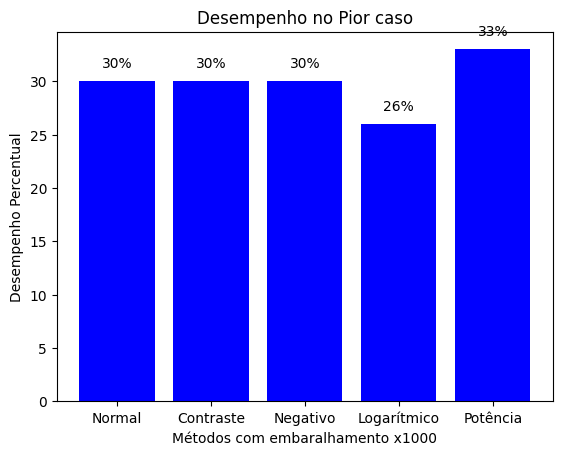

In [54]:
import matplotlib.pyplot as plt
import numpy as np

output = "Graficos"
situcao = ''
teste = 0

#situacao =  "Melhor"
#teste = 10 
#dados = [61,59,62,61,61]
#teste = 100 
#dados = [66,68,67,66,68]
#teste = 1000 
#dados = [71,72,71,70,72]

#situacao =  "Medio"

#teste = 10 
#dados = [51,53,49,51,46]
#teste = 100 
#dados = [48,48,50,49,50]
#teste = 1000 
#dados = [49,47,49,49,50]

situacao =  "Pior"

#teste = 10 
#dados = [43,43,37,41,34]
#teste = 100 
#dados = [30,33,33,34,33]
teste = 1000 
dados = [30,30,30,26,33]



# Nomes dos métodos
metodos = ['Normal','Contraste', 'Negativo', 'Logarítmico', 'Potência']

# Criar gráfico de barras
plt.bar(metodos, dados, color="blue")

# Adicionar rótulos e título
plt.xlabel(f'Métodos com embaralhamento x{teste}')
plt.ylabel('Desempenho Percentual')
plt.title(f'Desempenho no {situacao} caso')

# Adicionar percentuais acima das barras
for i, valor in enumerate(dados):
    plt.text(i, valor + 1, f'{valor}%', ha='center', va='bottom')

# Exibir o gráfico
plt.savefig(f"Graficos/{situacao}_x_{teste}.jpg")
